In [1]:
import numpy as np
import matplotlib.pyplot as plt

from src.puot import PUOT
from src.algo import calc_U, solve_entropic_uot, solve_entropic_puot, round_plan
from demo import gen_gaussian, gen_fragmented_hypercube
from visualize import visualize_2D_plan, visualize_3D_plan

# Random seed
SEED = 3698

In [2]:
# Dimensions
n = 20
m = 20
d = 3

In [3]:
# Generate synthetic data
datatype = 'Gaussian'
if datatype == 'Gaussian':
    k_star = 3
    X, Y = gen_gaussian(n, m, d, k_star, seed=SEED)
elif datatype == 'Hypercube':
    k_star = 3
    X, Y = gen_fragmented_hypercube(n, m, d, k_star, seed=SEED)

In [4]:
np.random.seed(SEED)

# Generate marginals
alpha = 4.0
beta = 2.0

a = np.random.rand(n)
b = np.random.rand(m)

a = a / a.sum() * alpha
b = b / b.sum() * beta

In [5]:
# Regularization parameters
tau = np.float64(5.0)

# Dimension of subspace
k = 2

# Original PUOT
puot = PUOT(X, Y, a, b, tau, k)

In [6]:
# Original UOT
uot = puot.original()
pi_star = uot.optimize_f()
f_star = uot.calc_f(pi_star)

15.17721096373455


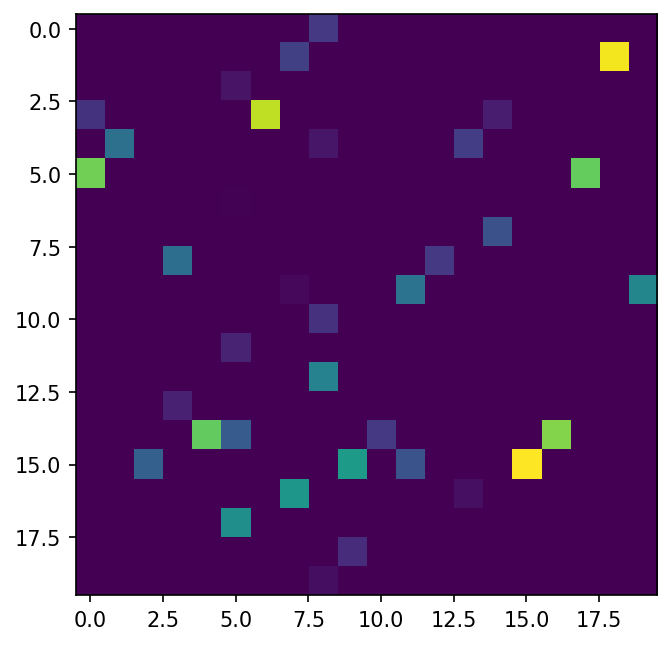

In [7]:
print(f_star)
fig, ax = plt.subplots(1, 1, figsize=(5, 10), dpi=150)
ax.imshow(pi_star)
plt.show()

In [8]:
# Entropic UOT
eps = 1
eta = eps / calc_U(uot, eps)

euot = uot.entropic_regularize(eta)
# u_hat, v_hat = euot.optimize_h('SCS', verbose=True)
pi_hat = euot.optimize_g() #euot.calc_pi(u_hat, v_hat)
f_hat = euot.calc_f(pi_hat)

15.180292086027578


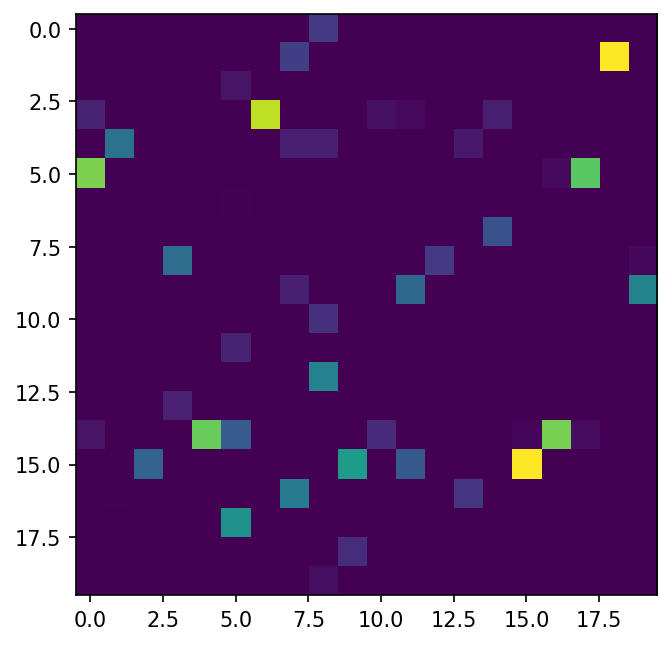

In [9]:
print(f_hat)
fig, ax = plt.subplots(1, 1, figsize=(5, 10), dpi=150)
ax.imshow(pi_hat)
plt.show()

In [10]:
u, v = solve_entropic_uot(euot, np.zeros(n), np.zeros(m), 10000)
pi = euot.calc_pi(u, v)
f = euot.calc_f(pi)

15.18077619782354


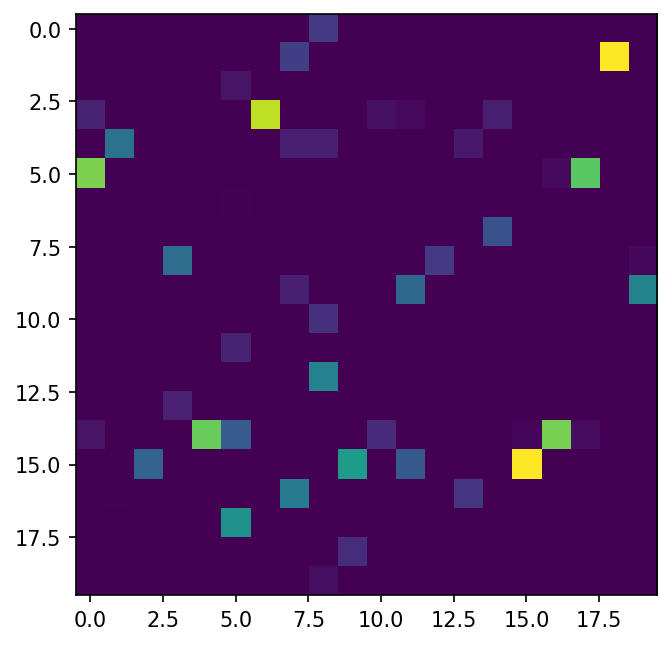

In [11]:
print(f)

fig, ax = plt.subplots(1, 1, figsize=(5, 10), dpi=150)
ax.imshow(pi)
plt.show()

In [12]:
# Entropic regularized PUOT
epuot = puot.entropic_regularize(eta)

In [13]:
# Initial u and v
u0, v0 = np.zeros(n), np.zeros(m)

# Initial U
U0, _ = np.linalg.qr(np.random.randn(d, k))

In [14]:
# Step size
delta = np.float64(1e-4)

# Stopping condition
eps_uv = np.float64(1.0)
eps_U = np.float64(0.001)

# Run algorithm
log = solve_entropic_puot(epuot,
                            u0, v0,
                            U0,
                            delta,
                            eps_uv, eps_U,
                            max_uv=None, max_U=None,
                            save_uv=True, save_U=True)

1 1.8781499409847786 2702 168 0.0009734506537667064
2 1.7705503751273186 2703 191 0.00098663598249871
3 1.7385202840868021 2703 169 0.0009836606644187177
4 1.8686804259805436 2703 103 0.000996101561954184
5 1.8539366168246305 2704 99 0.0009762693691106608
6 1.9146178522464719 2704 79 0.0008910756812734238
7 2.104706321693425 2704 51 0.0009954281075996345
8 2.1516075972895266 2704 47 0.0008832568820947966
9 2.1804721528746756 2704 45 0.0008938749043534833
10 2.2030968852007518 2703 44 0.0009433924257119266
11 2.214380139997699 2703 45 0.0008597501349682384
12 2.209768367936902 2703 47 0.0008865764854249349
13 2.195070288858104 2703 50 0.0009525175044292398
14 2.178377349409163 2703 54 0.0009823454342013337
15 2.1639157610770505 2703 59 0.0009618591249089633
16 2.155574546119778 2702 65 0.000893600377826609
17 2.1655446852152656 2702 70 0.000926523106877521
18 2.2256830276474444 2701 70 0.0009656873929865934
19 2.3757170658744498 2701 56 0.0008607825867686981
20 2.6223907416906393 2700 3

In [15]:
u, v = log['u'][-1], log['v'][-1]
U = log['U'][-1]

C = epuot.calc_proj_cost(U)
pi = epuot.calc_pi(u, v, C)

f = log['f'][-1]

16.46068767000881


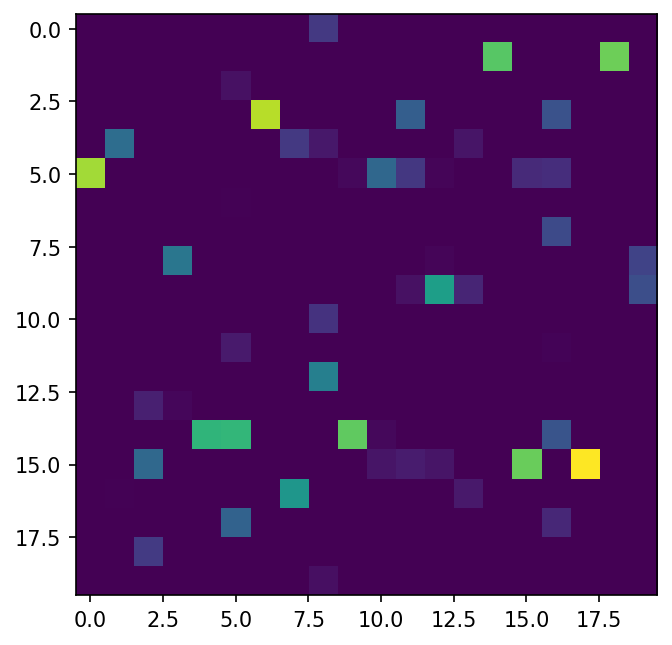

In [16]:
print(uot.calc_f(pi))
fig, ax = plt.subplots(1, 1, figsize=(5, 10), dpi=150)
ax.imshow(pi)
plt.show()

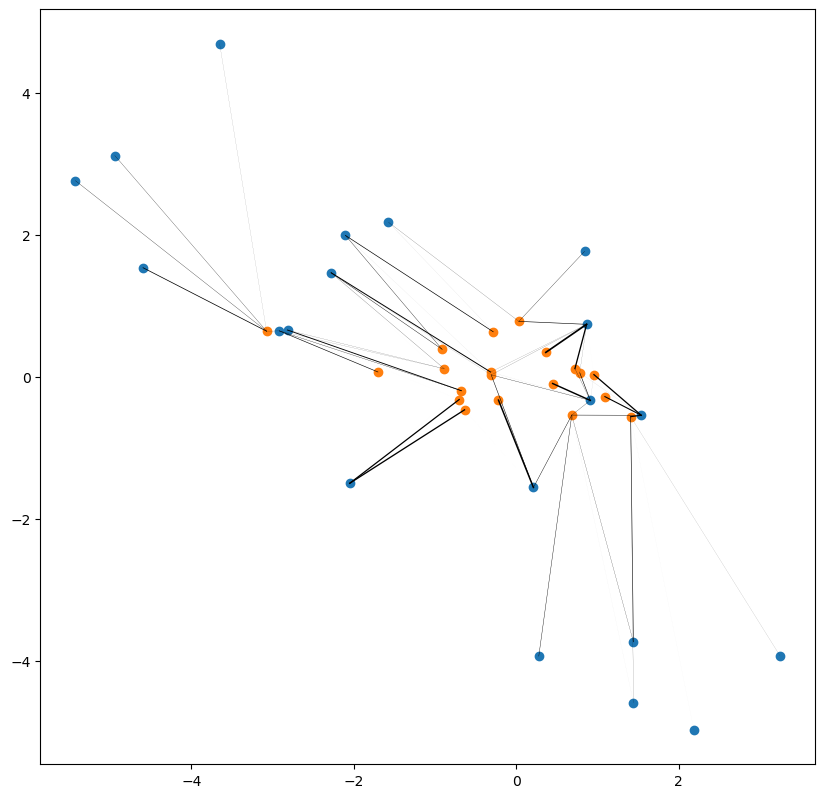

In [17]:
visualize_2D_plan(X, Y, U, pi)

In [18]:
visualize_3D_plan(X, Y, U, pi)

In [19]:
for uk, vk, Uk in zip(log['u'], log['v'], log['U']):
    Ck = epuot.calc_proj_cost(Uk)
    pik = epuot.calc_pi(uk, vk, Ck)
    print(euot.calc_g(pik) - euot.calc_g(pi_star))

2.5986110202918553
2.489561836831374
2.785379905920365
2.8299464564382575
2.9397441325485794
2.64298992155285
2.3470967079147798
2.3277093945226994
2.334766763622021
2.3517266433946347
2.378935793767475
2.41795969411314
2.4656598853110587
2.518368128697631
2.5737174968636616
2.6247190295001026
2.6308817552660138
2.482737545100875
2.1539904960067524
1.8475326592206152
1.6729208569450407
1.5382817189273013
1.4129075208679787
1.2948599996815382
1.190015333831706
1.1018471999224708
1.0299666451651213
0.9724829566835052
0.927305737724236
0.8919589308259965
0.8638382150511337
0.8408309189433734
0.8211838612684783
0.8026943284529864
0.7822393817013271
0.7613591741013934
0.7531389564991517
0.7531192005943073
0.7522318636604375
0.7500508899634664
0.7575675568045614
0.7860578044984177
0.816139852782749
0.8391717764249922
0.8568103270981222
0.8710730518621084
0.8830961248778841
0.8934721959072984
0.9025163615157865
0.9104263169541511
0.9173474369482975
0.9234157612589602
0.9287990561812638
0.9337